# DATA LOADING AND PREPROCESSING

In [2]:
import idx2numpy
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

In [3]:
#data loading
train_images=idx2numpy.convert_from_file('archive-2/train-images.idx3-ubyte')
train_labels=idx2numpy.convert_from_file('archive-2/train-labels.idx1-ubyte')

test_images=idx2numpy.convert_from_file('archive-2/t10k-images.idx3-ubyte')
test_labels=idx2numpy.convert_from_file('archive-2/t10k-labels.idx1-ubyte')


In [4]:
#checking shape of the data
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")


Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


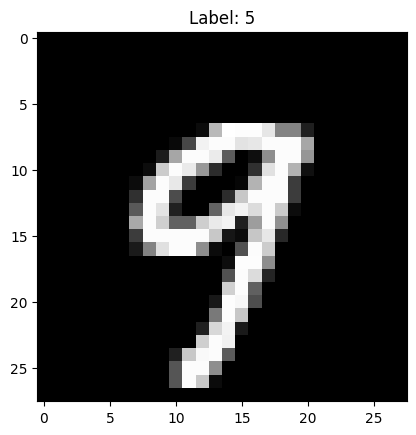

In [5]:
import matplotlib.pyplot as plt
plt.imshow(train_images[45], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()


In [22]:
#preprocesisng dataset for implementation
subset_size = 10000

train_images_subset=train_images[:subset_size]
train_labels_subset=train_labels[:subset_size]
train_images_flattened =train_images_subset.reshape(subset_size, -1)

In [23]:
#seperating the training and testing sets
split_index = int(0.8 * subset_size)
train_images_train=train_images_flattened[:split_index]
train_labels_train=train_labels_subset[:split_index]
train_images_test=train_images_flattened[split_index:]
train_labels_test=train_labels_subset[split_index:]

# QUESTION 1 PART B (TRAINING A LINEAR SVM CLASSIFIER)

In [24]:
#fitting the svc model without standard scaler
svm_clf_linear =SVC(kernel="linear", decision_function_shape="ovr", random_state=42)
svm_clf_linear.fit(train_images_train, train_labels_train)

SVC(kernel='linear', random_state=42)

In [25]:
#making predictions for training and testing sets
train_predictions_linear =svm_clf_linear.predict(train_images_train)
train_accuracy_linear =accuracy_score(train_labels_train, train_predictions_linear)
print(f"training accuracy for linear svm without scaling: {train_accuracy_linear * 100:.2f}%")

test_predictions_linear = svm_clf_linear.predict(train_images_test)
test_accuracy_linear = accuracy_score(train_labels_test, test_predictions_linear)
print(f"testing accuracy for linear svm without scaling: {test_accuracy_linear * 100:.2f}%")

training accuracy for linear svm without scaling: 100.00%
testing accuracy for linear svm without scaling: 90.35%


# QUESTION 1 PART C (TRAINING A LINEAR SVM CLASSIFIER AFTER SCALING)

In [27]:
#scaling the model using standard scaler
scaler = StandardScaler()
train_images_train_scaled = scaler.fit_transform(train_images_train)
train_images_test_scaled = scaler.transform(train_images_test)
#training the model
svm_clf_linear_scaled = SVC(kernel="linear", decision_function_shape="ovr", random_state=42)
svm_clf_linear_scaled.fit(train_images_train_scaled, train_labels_train)

SVC(kernel='linear', random_state=42)

In [28]:
#making predictions for training and testing sets
train_predictions_linear_scaled = svm_clf_linear_scaled.predict(train_images_train_scaled)
train_accuracy_linear_scaled = accuracy_score(train_labels_train, train_predictions_linear_scaled)
print(f"testing accuracy for linear svm with scaling: {train_accuracy_linear_scaled * 100:.2f}%")

test_predictions_linear_scaled = svm_clf_linear_scaled.predict(train_images_test_scaled)
test_accuracy_linear_scaled = accuracy_score(train_labels_test, test_predictions_linear_scaled)
print(f"testing accuracy for linear svm with scaling: {test_accuracy_linear_scaled * 100:.2f}%")



testing accuracy for linear svm with scaling: 100.00%
testing accuracy for linear svm with scaling: 90.65%


# QUESTION 1 PART D (TRAINING A NON-LINEAR SVM USING RBF KERNEL)

In [29]:
#fitting the rbf model 
svm_clf_rbf = SVC(kernel="rbf", C=0.1, decision_function_shape="ovr", random_state=42)
svm_clf_rbf.fit(train_images_train, train_labels_train)


SVC(C=0.1, random_state=42)

In [30]:
#making predictions for training and testing sets
train_predictions = svm_clf_rbf.predict(train_images_train)
training_accuracy = accuracy_score(train_labels_train, train_predictions)
print(f"training accuracy with rbf kernel: {training_accuracy * 100:.2f}%")

test_predictions = svm_clf_rbf.predict(train_images_test)
test_accuracy = accuracy_score(train_labels_test, test_predictions)
print(f"test accuracy with rbf kernel: {test_accuracy * 100:.2f}%")

training accuracy with rbf kernel: 93.96%
test accuracy with rbf kernel: 90.90%
